# Q2.4 Image Classification with Neural Network

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import torch.nn as nn
import torch.optim as optim

### Loading the dataset

In [ ]:
#Specifying the data folder location and saving the path to extract images
import tarfile
import io
data_dir = "/Users/admin/Desktop/SEM3/DeepLearning/Lab 1/Micro_Organism"
if not os.path.exists(data_dir):  # check if the data is already extracted to avoid duplicates
    with tarfile.open("/Users/admin/Desktop/SEM 3/Deep Learning/Data.tgz", 'r:gz') as tar:
        tar.extractall(path="/Users/admin/Desktop/SEM3/DeepLearning/Lab 1/")

In [ ]:
#Number of images in the dataset
total_files = sum(len(files) for _, _, files in os.walk(data_dir) if files)
print(total_files-1) #excluding 1 file counted as main folder name

789


### Summarizing and visualizing the data

#### 3.b. *Number of pixels in the image*

In [ ]:
import os
from PIL import Image

# Path to the extracted image file
image_file_path = "/Users/admin/Desktop/SEM3/DeepLearning/Lab 1/Micro_Organism/Amoeba/Image_5.jpg"  # Replace with the actual filename

# Check if the file exists
if os.path.exists(image_file_path):
    # Open the image using PIL
    with Image.open(image_file_path) as img:
        # Get the dimensions (width and height) of the image
        width, height = img.size
        print("Width of the image:", width, "pixels")
        print("Height of the image:", height, "pixels")
else:
    print("The specified image file does not exist.")

Width of the image: 896 pixels
Height of the image: 720 pixels


In [ ]:
# Define constants for image transformation
image_height = 100
image_width = 100
batch_size = 32

In [ ]:
# Defining data transformation to tensor
transform = transforms.Compose([
        transforms.RandomResizedCrop(image_height),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

In [ ]:
# Loading the dataset
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

#### 3.c. *Number of images per class*

In [ ]:
#Getting class labels for the dataset
class_names = dataset.classes
print(class_names)

['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']


In [ ]:
print("Number of Classes: ",len(class_names))

Number of Classes:  8


In [ ]:
from collections import defaultdict

# Create a dictionary to store the count of images per class
images_per_class = defaultdict(int)

# Count the number of images per class
for _, label in dataset:
    class_name = class_names[label]
    images_per_class[class_name] += 1

# Print the number of images per class
for class_name, count in images_per_class.items():
    print(f"Number of images in class '{class_name}': {count}")

Number of images in class 'Amoeba': 72
Number of images in class 'Euglena': 168
Number of images in class 'Hydra': 76
Number of images in class 'Paramecium': 152
Number of images in class 'Rod_bacteria': 85
Number of images in class 'Spherical_bacteria': 86
Number of images in class 'Spiral_bacteria': 75
Number of images in class 'Yeast': 75


#### 3.d. *Displaying sample images per class*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

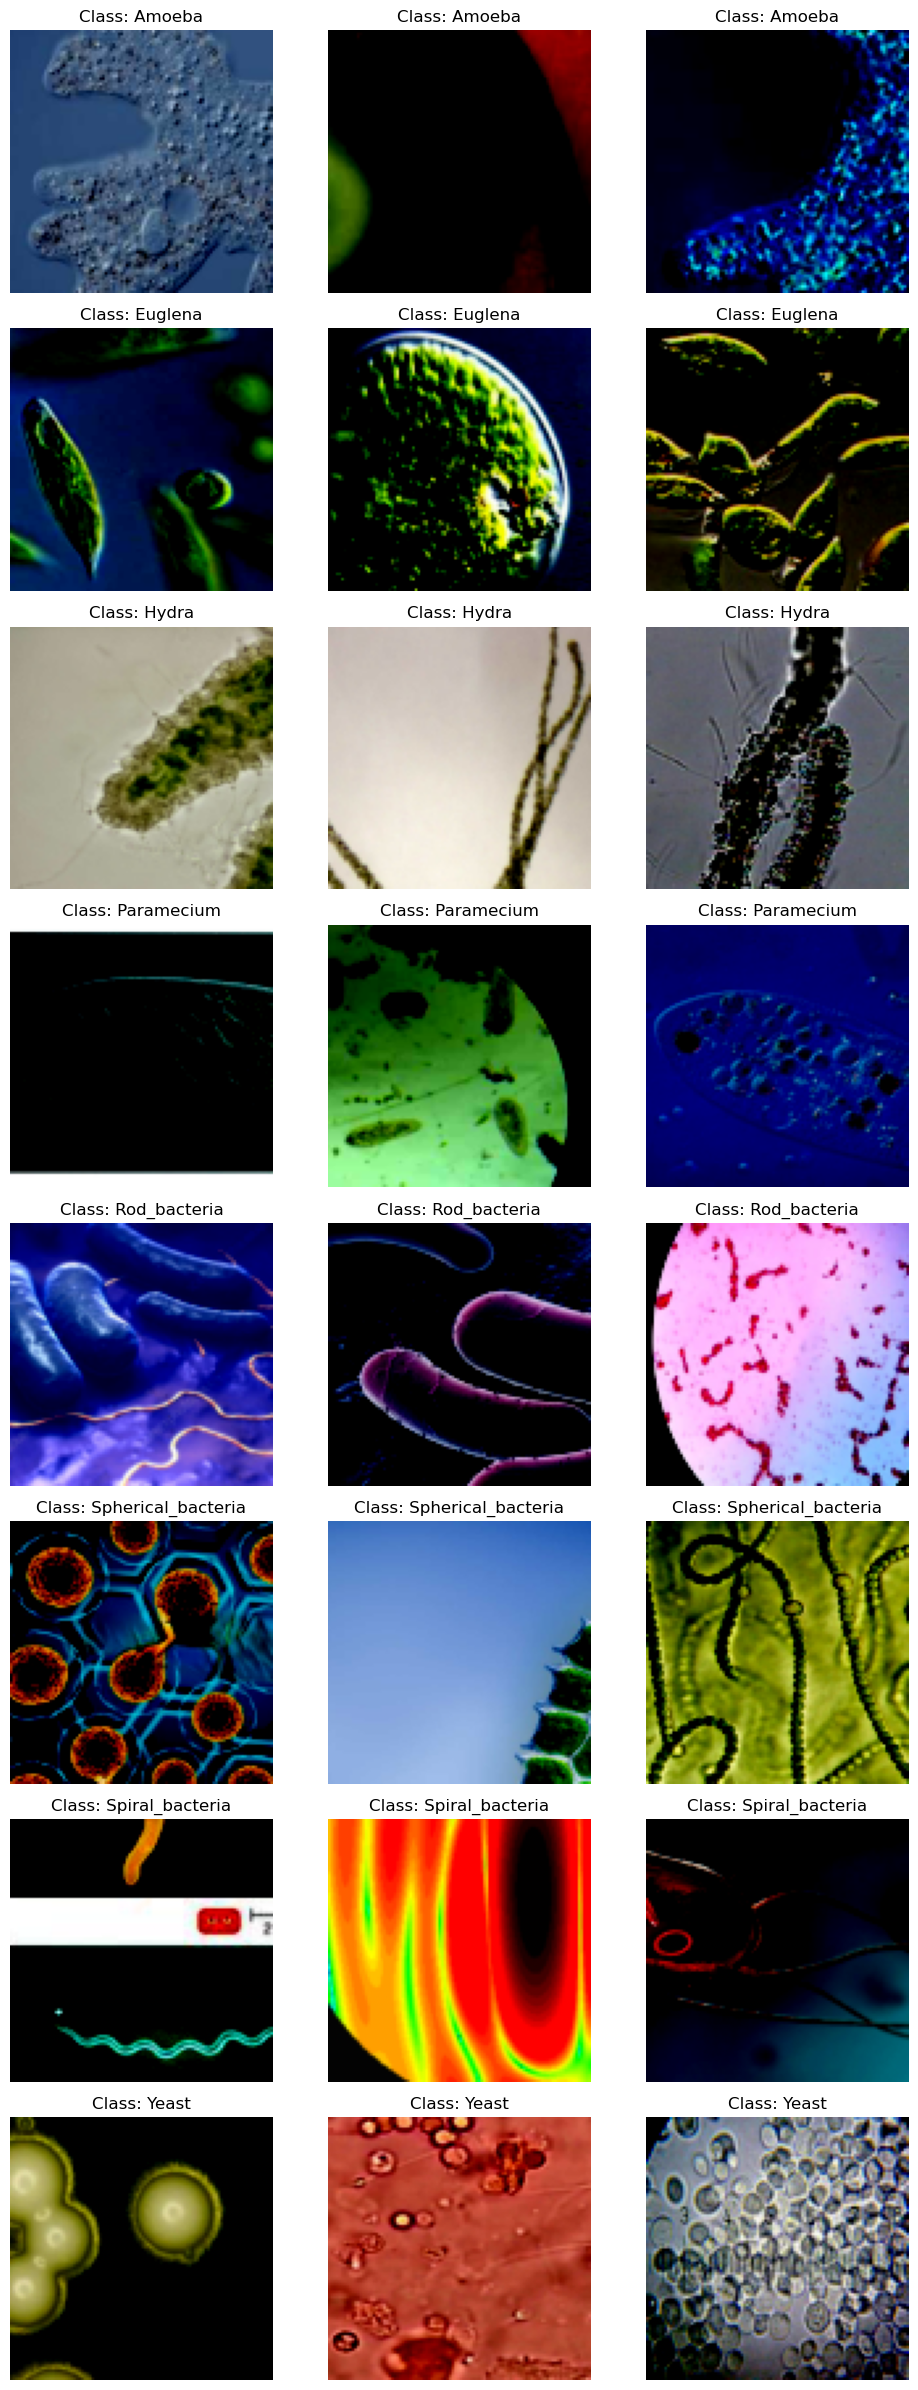

In [ ]:
# Create a dictionary to store the displayed images for each class
displayed_images = {class_name: [] for class_name in class_names}

# Create a counter to keep track of displayed images for each class
displayed_count = {class_name: 0 for class_name in class_names}

# Display 3 images of each class
for img, label in dataset:
    class_name = class_names[label]
    if displayed_count[class_name] < 3:
        displayed_images[class_name].append(img)
        displayed_count[class_name] += 1
        if all(count == 3 for count in displayed_count.values()):
            break

# Create a figure and axes
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 24))

# Display the images in a grid
for i, class_name in enumerate(class_names):
    for j in range(3):
        ax = axes[i, j]
        ax.imshow(displayed_images[class_name][j].permute(1, 2, 0))  # Convert from tensor to image format
        ax.set_title(f"Class: {class_name}")
        ax.axis('off')

plt.tight_layout()
plt.show()

### Splitting the data for training and validation

#### 3.a. *Number of entities in the training and testing set*

In [ ]:
# Splitting the dataset into train and validation sets using 80:20 split
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(val_dataset))

Train dataset size: 631
Test dataset size: 158


#### 3.a. *Number of classes in the target variable*

In [ ]:
# Print the number of classes in the target variable for train and validation datasets
num_classes_train = len(train_dataset.dataset.classes)
num_classes_val = len(val_dataset.dataset.classes)
print("Number of classes in train dataset:", num_classes_train)
print("Number of classes in test dataset:", num_classes_val)

Number of classes in train dataset: 8
Number of classes in test dataset: 8


In [ ]:
# Creating data loaders for the model
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define constants for nueral network
num_classes = 8
learning_rate = 0.001
num_epochs = 20

### Training Neural Networks

### 4.a. *Determine number of layers and neurons in each layer*

In [ ]:
# Define the neural network model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * (image_height // 8) * (image_width // 8), 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 128 * (image_height // 8) * (image_width // 8))
        x = self.fc_layers(x)
        return x

The model consists of 3 convolutional layers having inputs of 32, 64 and 128 respectively, and 2 fully connected layers having input 128 and 8. The number of neurons in each layer are calculated in the following block. For the pooling layers we are not counting neurons because they don't involve any computation.

In [ ]:
# Define the image dimensions
image_height = 100
image_width = 100

# Calculate the number of neurons in each convolutional layer
num_neurons_conv1 = 32 * image_height * image_width
num_neurons_conv2 = 64 * (image_height // 2) * (image_width // 2)
num_neurons_conv3 = 128 * (image_height // 4) * (image_width // 4)

# Calculate the number of neurons in each fully connected layer
num_neurons_fc1 = 128
num_neurons_fc2 = num_classes

# Print the results
print("Number of Neurons in Convolutional Layers:")
print(f"Convolutional Layer 1: {num_neurons_conv1}")
print(f"Convolutional Layer 2: {num_neurons_conv2}")
print(f"Convolutional Layer 3: {num_neurons_conv3}")
print("\nNumber of Neurons in Fully Connected Layers:")
print(f"Fully Connected Layer 1: {num_neurons_fc1}")
print(f"Fully Connected Layer 2: {num_neurons_fc2}")

Number of Neurons in Convolutional Layers:
Convolutional Layer 1: 320000
Convolutional Layer 2: 160000
Convolutional Layer 3: 80000

Number of Neurons in Fully Connected Layers:
Fully Connected Layer 1: 128
Fully Connected Layer 2: 8


In [ ]:
# Initialize the model
model = CNN()
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Define model Training loop
def train_model(model, criterion, optimizer, num_epochs=10):
    train_f1_scores = []
    val_f1_scores = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        true_labels_train = []
        predicted_labels_train = []

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            true_labels_train.extend(labels.cpu().numpy())
            predicted_labels_train.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        # Calculate F1 score for training set
        train_f1 = f1_score(true_labels_train, predicted_labels_train, average='macro')
        train_f1_scores.append(train_f1)

        print(f"\nEpoch {epoch + 1}/{num_epochs} Train Loss: {epoch_loss:.4f} Train Acc: {epoch_acc:.4f} Train F1: {train_f1:.4f}")

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        true_labels_val = []
        predicted_labels_val = []

        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.set_grad_enabled(False):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            true_labels_val.extend(labels.cpu().numpy())
            predicted_labels_val.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(val_loader.dataset)
        epoch_acc = running_corrects.double() / len(val_loader.dataset)

        # Calculate F1 score for validation set
        val_f1 = f1_score(true_labels_val, predicted_labels_val, average='macro')
        val_f1_scores.append(val_f1)

        print(f"Epoch {epoch + 1}/{num_epochs} Val Loss: {epoch_loss:.4f} Val Acc: {epoch_acc:.4f} Val F1: {val_f1:.4f}")

    return train_f1_scores, val_f1_scores

In [ ]:
# Create model instance
model = CNN().to(device)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model
train_model(model, criterion, optimizer, num_epochs=num_epochs)


Epoch 1/20 Train Loss: 2.0135 Train Acc: 0.2124 Train F1: 0.0952
Epoch 1/20 Val Loss: 1.9708 Val Acc: 0.2848 Val F1: 0.1113

Epoch 2/20 Train Loss: 1.9126 Train Acc: 0.2758 Train F1: 0.1397
Epoch 2/20 Val Loss: 1.9597 Val Acc: 0.2089 Val F1: 0.1142

Epoch 3/20 Train Loss: 1.8933 Train Acc: 0.2694 Train F1: 0.1619
Epoch 3/20 Val Loss: 1.9147 Val Acc: 0.2658 Val F1: 0.1566

Epoch 4/20 Train Loss: 1.8231 Train Acc: 0.2932 Train F1: 0.1860
Epoch 4/20 Val Loss: 1.8886 Val Acc: 0.3544 Val F1: 0.2179

Epoch 5/20 Train Loss: 1.7942 Train Acc: 0.3265 Train F1: 0.2174
Epoch 5/20 Val Loss: 1.8709 Val Acc: 0.2975 Val F1: 0.1871

Epoch 6/20 Train Loss: 1.8116 Train Acc: 0.3106 Train F1: 0.2244
Epoch 6/20 Val Loss: 1.8297 Val Acc: 0.3038 Val F1: 0.2422

Epoch 7/20 Train Loss: 1.7752 Train Acc: 0.3201 Train F1: 0.2604
Epoch 7/20 Val Loss: 1.8783 Val Acc: 0.2975 Val F1: 0.2104

Epoch 8/20 Train Loss: 1.7715 Train Acc: 0.3122 Train F1: 0.2410
Epoch 8/20 Val Loss: 1.8294 Val Acc: 0.2785 Val F1: 0.1974


([0.09520602270994555,
  0.13974618604609604,
  0.16185490041658415,
  0.18595827068573825,
  0.21736931952268088,
  0.2244497855345467,
  0.2603971429078553,
  0.241047802691736,
  0.2963651830807855,
  0.2881039568705962,
  0.31917434465189565,
  0.31808347636137135,
  0.3057150304373447,
  0.31295228106006706,
  0.34738714250461306,
  0.35558022008239026,
  0.36554969360675577,
  0.3642672668207405,
  0.4018452797574817,
  0.4093013815007325],
 [0.11132538569424964,
  0.11423231821692596,
  0.15663789788067145,
  0.21794901831965438,
  0.1871495689913582,
  0.24220668234446785,
  0.21039947470981957,
  0.19743714868244153,
  0.24183969965219965,
  0.25199683734052536,
  0.24750000457834448,
  0.2533579391828148,
  0.24225377379008617,
  0.27291777071188833,
  0.2564080140705528,
  0.2574420827710301,
  0.24433111603843313,
  0.2353538340208135,
  0.261451230887037,
  0.19323881841131074])

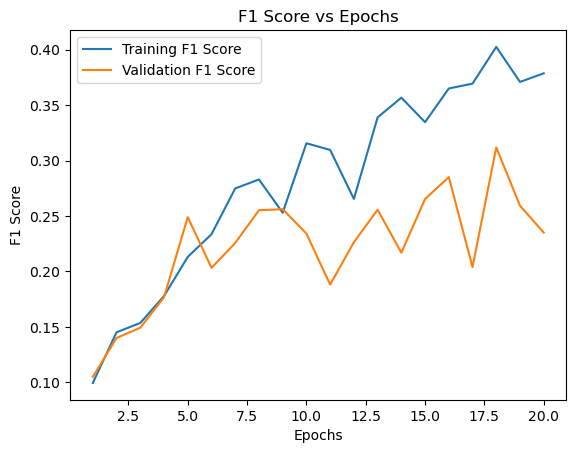

In [ ]:
# Plot F1 scores vs epochs
plt.plot(range(1, num_epochs + 1), train_f1_scores[:num_epochs], label='Training F1 Score')
plt.plot(range(1, num_epochs + 1), val_f1_scores[:num_epochs], label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()
plt.show()

The final model accuracy after training over 20 epochs was foulnd to be 26.58% while the final F1 Score came out to be 0.1932. The training accuracy was better at nearly 47% and F1 Score of 0.4993.

We can see that the model is prone to slight overfitting where the training and validation performance closesly match other during initial training epochs. But as the number of epochs increase, the training accurac keeps incresing but validation scores don't improve significantly.

We will now try other variations in the model architecture as shown in following sections.

### *4.b. Changing Activation Function*

Activation functions are used to introduce non-linearity to the network, allowing it to learn complex patterns and relationships in the data. They are applied to the output of each neuron in a neural network layer. The different activation functions used here are:

*1.Sigmoid*: Results the output to be an S-shaped curve that constrains input values into the range (0, 1). It is generally used for binary classification problems where the output needs to be interpreted as probabilities.


*2.Hyperbolic Tangent (Tanh)*: It is similar to the sigmoid function but causes outputs to be in the range (-1, 1). The input is made to be centered around zero, which helps in better gradient propagation during training. The function is used in the hidden layers of neural networks.


*3.Exponential Linear Unit (ELU)*: The ELU function is similar to the ReLU function orginally used in this code, but results in a smooth non-linearity for negative inputs, reducing the risk of dead neurons. The output is in the range (-∞, ∞).


*4.Swish*: This function smoothly interpolates between a linear function for large positive values of x and a sigmoid function for negative values of x. The output range is approximately between -1 and 1. It thus combines the advantages of linear and sigmoid functions.

In [ ]:
# Define the neural network model
class CNN(nn.Module):
    def __init__(self, activation_function='relu'):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            self.get_activation(activation_function),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            self.get_activation(activation_function),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            self.get_activation(activation_function),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * (image_height // 8) * (image_width // 8), 128),
            self.get_activation(activation_function),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 128 * (image_height // 8) * (image_width // 8))
        x = self.fc_layers(x)
        return x

    def get_activation(self, activation):
        if activation == 'swish':
            return Swish()
        elif activation == 'elu':
            return nn.ELU()
        elif activation == 'tanh':
            return nn.Tanh()
        elif activation == 'sigmoid':
            return nn.Sigmoid()

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

In [ ]:
# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Define hyperparameters
num_epochs = 10

In [ ]:
# Create model instances with different activation functions
activation_functions = ['swish', 'elu', 'tanh', 'sigmoid']
for activation_function in activation_functions:
    print(f"\nTraining with activation function: {activation_function}")
    model = CNN(activation_function=activation_function).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    train_model(model, criterion, optimizer, num_epochs=num_epochs)


Training with activation function: swish

Epoch 1/10 Train Loss: 1.9873 Train Acc: 0.2250 Train F1: 0.1496
Epoch 1/10 Val Loss: 1.9453 Val Acc: 0.2215 Val F1: 0.1073

Epoch 2/10 Train Loss: 1.8875 Train Acc: 0.2710 Train F1: 0.1733
Epoch 2/10 Val Loss: 1.8577 Val Acc: 0.3291 Val F1: 0.2560

Epoch 3/10 Train Loss: 1.9169 Train Acc: 0.2726 Train F1: 0.1953
Epoch 3/10 Val Loss: 1.8760 Val Acc: 0.2848 Val F1: 0.1800

Epoch 4/10 Train Loss: 1.8513 Train Acc: 0.3122 Train F1: 0.2252
Epoch 4/10 Val Loss: 1.8574 Val Acc: 0.3228 Val F1: 0.2533

Epoch 5/10 Train Loss: 1.8332 Train Acc: 0.3217 Train F1: 0.2395
Epoch 5/10 Val Loss: 1.7432 Val Acc: 0.3797 Val F1: 0.2899

Epoch 6/10 Train Loss: 1.7813 Train Acc: 0.3518 Train F1: 0.2666
Epoch 6/10 Val Loss: 1.7724 Val Acc: 0.3544 Val F1: 0.2655

Epoch 7/10 Train Loss: 1.7116 Train Acc: 0.3550 Train F1: 0.2907
Epoch 7/10 Val Loss: 1.7444 Val Acc: 0.3101 Val F1: 0.2035

Epoch 8/10 Train Loss: 1.7115 Train Acc: 0.3629 Train F1: 0.2891
Epoch 8/10 Val Lo

We gave trained the model for 10 epochs with each of the activation functions. Model performance was found to be worst in the case of sigmoid activation function where the training and validation accuracies did not improve at all in the final epochs, making the final accuracy drop to 21% and F1 values to 0.04.

Out of all 4, ELU performed much better with training and validation accuracies of around 33%. The model also shows less overfitting as the training and validation metrics are quite consistent withe ach other.

Using swish and tanh we get similar results in terms of accuracy, which is only a littele less than that obtained from ELU. The F1 scores are a litlle less for these functions and there is not much improvement over the performance obtained by using RelU function. Hence we will continue to use ReLU as the activation function for the model.

### *4.c. Implementing Dropout*

Dropout is a regularization technique used to prevent overfitting and improve the generalization ability of the deep learning model. It involves randomly dropping out (i.e., setting to zero) a proportion of the neurons in a layer during training.

In the following section we have implemented dropout by adding a layer after each MaxPool layer to remove 20% of the neurons before inputing it to the next layer. One layer with 40% dropout rate has also been added before the last fully connected layer to regularize end weights.

In [ ]:
# Define the neural network model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),  # Adding dropout layer with 20% dropout rate
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2), # Adding dropout layer with 20% dropout rate
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2) # Adding dropout layer with 20% dropout rate
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * (image_height // 8) * (image_width // 8), 128),
            nn.ReLU(),
            nn.Dropout(0.4),  # Dropout layer with 40% dropout probability
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 128 * (image_height // 8) * (image_width // 8))
        x = self.fc_layers(x)
        return x

In [ ]:
# Define hyperparameters
num_epochs = 20
# Create model instance
model = CNN().to(device)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model
train_model(model, criterion, optimizer, num_epochs=num_epochs)


Epoch 1/20 Train Loss: 2.0431 Train Acc: 0.2013 Train F1: 0.0833
Epoch 1/20 Val Loss: 1.9680 Val Acc: 0.2595 Val F1: 0.0978

Epoch 2/20 Train Loss: 1.9559 Train Acc: 0.2219 Train F1: 0.1204
Epoch 2/20 Val Loss: 1.9633 Val Acc: 0.2089 Val F1: 0.1024

Epoch 3/20 Train Loss: 1.9145 Train Acc: 0.2615 Train F1: 0.1512
Epoch 3/20 Val Loss: 1.9072 Val Acc: 0.3418 Val F1: 0.2223

Epoch 4/20 Train Loss: 1.8781 Train Acc: 0.2583 Train F1: 0.1668
Epoch 4/20 Val Loss: 1.9528 Val Acc: 0.2785 Val F1: 0.1798

Epoch 5/20 Train Loss: 1.8629 Train Acc: 0.3027 Train F1: 0.1985
Epoch 5/20 Val Loss: 1.8960 Val Acc: 0.3038 Val F1: 0.1610

Epoch 6/20 Train Loss: 1.8466 Train Acc: 0.2948 Train F1: 0.2112
Epoch 6/20 Val Loss: 1.8815 Val Acc: 0.3101 Val F1: 0.1987

Epoch 7/20 Train Loss: 1.8152 Train Acc: 0.2916 Train F1: 0.2128
Epoch 7/20 Val Loss: 1.9150 Val Acc: 0.2722 Val F1: 0.2145

Epoch 8/20 Train Loss: 1.7729 Train Acc: 0.3170 Train F1: 0.2373
Epoch 8/20 Val Loss: 1.8158 Val Acc: 0.3418 Val F1: 0.2213


([0.08325087929451291,
  0.12036919868474748,
  0.15124545090964342,
  0.16680919626376967,
  0.19845064997317738,
  0.21122828223746787,
  0.2128402173504133,
  0.23733286409763404,
  0.2409562236428428,
  0.26257174127351923,
  0.2642023490433777,
  0.2681036898628387,
  0.2889391032895844,
  0.29336326618974273,
  0.27265176385884904,
  0.32392865924588765,
  0.3030125475551201,
  0.3223804601578215,
  0.32933476311294596,
  0.34044371395443385],
 [0.0978480681385611,
  0.10237455197132617,
  0.22232237673951327,
  0.17979402397116753,
  0.16095481670929243,
  0.19871943698434885,
  0.2144764794253656,
  0.2213318514540319,
  0.17638668670778762,
  0.19002304147465438,
  0.17049356779748936,
  0.2916922834644353,
  0.19568751637943216,
  0.261209544401395,
  0.23159411290909698,
  0.20709733708172023,
  0.25229108166608166,
  0.23897321476829975,
  0.2649204296418732,
  0.22443750589023806])

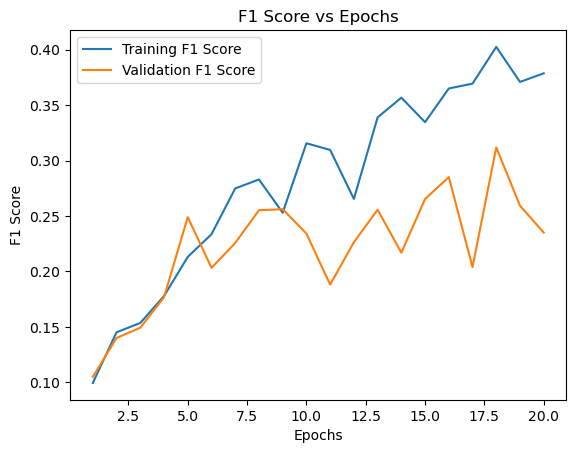

In [ ]:
# Plot F1 scores vs epochs
plt.plot(range(1, num_epochs + 1), train_f1_scores[:num_epochs], label='Training F1 Score')
plt.plot(range(1, num_epochs + 1), val_f1_scores[:num_epochs], label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()
plt.show()

We can see that the model performance is not significantly changed by adding the dropout layers as the final validation accuracy and F1 scores improve very slightly to 27.85% and 0.224 after training over 20 epochs. The overfitting nature of the model too seems to be slightly reduced. However the changes are not so significant as to change the whole architecture, thus we can retain one final dropout layer of 50% in the model

### *4.d. Using Regularization*

L1 and L2 regularization are used to prevent overfitting in neural networks by adding a regularization term to the loss function. These regularization terms penalize large weights in the network, encouraging the model to learn simpler and more generalizable representations of the data.

L1 regularization adds a penalty term to the loss function that is proportional to the absolute value of the weights and can cause some weights to become zero. It will be introduced in the model through the variable defined as l1_lambda = 0.001. For each parameter, we compute its L1 norm and add up all the L1 norms to calculate the total L1 regularization term. This is added to the original loss function and weights are calculated through backpropagation.

L2 regularization adds a penalty term to the loss function that is proportional to the square of the weights where weights may tend to zero eventually. This is inbuilt into the torch optimizer function and will be used by setting the parameter weight_decay=0.0001 when declaring the optimizer function.

In [ ]:
# Define the neural network model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * (image_height // 8) * (image_width // 8), 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 128 * (image_height // 8) * (image_width // 8))
        x = self.fc_layers(x)
        return x

In [ ]:
# Training loop
def train_model(model, criterion, optimizer, num_epochs=10):
    train_f1_scores = []
    val_f1_scores = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        true_labels_train = []
        predicted_labels_train = []

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # L1 regularization
                l1_lambda = 0.001
                l1_reg = torch.tensor(0., device=device)
                for param in model.parameters():
                    l1_reg += torch.norm(param, 1)
                loss += l1_lambda * l1_reg

                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            true_labels_train.extend(labels.cpu().numpy())
            predicted_labels_train.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        # Calculate F1 score for training set
        train_f1 = f1_score(true_labels_train, predicted_labels_train, average='macro')
        train_f1_scores.append(train_f1)

        print(f"\nEpoch {epoch + 1}/{num_epochs} Train Loss: {epoch_loss:.4f} Train Acc: {epoch_acc:.4f} Train F1: {train_f1:.4f}")

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        true_labels_val = []
        predicted_labels_val = []

        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.set_grad_enabled(False):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            true_labels_val.extend(labels.cpu().numpy())
            predicted_labels_val.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(val_loader.dataset)
        epoch_acc = running_corrects.double() / len(val_loader.dataset)

        # Calculate F1 score for validation set
        val_f1 = f1_score(true_labels_val, predicted_labels_val, average='macro')
        val_f1_scores.append(val_f1)

        print(f"Epoch {epoch + 1}/{num_epochs} Val Loss: {epoch_loss:.4f} Val Acc: {epoch_acc:.4f} Val F1: {val_f1:.4f}")

    return train_f1_scores, val_f1_scores

In [ ]:
# Define hyperparameters
num_epochs = 20
# Create model instance
model = CNN().to(device)
# Define loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
# Define optimizer with weight decay (equivalent to L2 regularization)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

# Train the model
train_model(model, criterion, optimizer, num_epochs=num_epochs)


Epoch 1/20 Train Loss: 6.1026 Train Acc: 0.1870 Train F1: 0.0641
Epoch 1/20 Val Loss: 2.0096 Val Acc: 0.2278 Val F1: 0.0891

Epoch 2/20 Train Loss: 3.2742 Train Acc: 0.2314 Train F1: 0.0973
Epoch 2/20 Val Loss: 1.9703 Val Acc: 0.2278 Val F1: 0.0857

Epoch 3/20 Train Loss: 2.6873 Train Acc: 0.2361 Train F1: 0.1035
Epoch 3/20 Val Loss: 1.9365 Val Acc: 0.2658 Val F1: 0.1090

Epoch 4/20 Train Loss: 2.5042 Train Acc: 0.2456 Train F1: 0.0965
Epoch 4/20 Val Loss: 1.9632 Val Acc: 0.2278 Val F1: 0.0757

Epoch 5/20 Train Loss: 2.4120 Train Acc: 0.2615 Train F1: 0.1085
Epoch 5/20 Val Loss: 1.9618 Val Acc: 0.2595 Val F1: 0.1117

Epoch 6/20 Train Loss: 2.3875 Train Acc: 0.2552 Train F1: 0.1090
Epoch 6/20 Val Loss: 1.9497 Val Acc: 0.2658 Val F1: 0.1169

Epoch 7/20 Train Loss: 2.3529 Train Acc: 0.2504 Train F1: 0.1085
Epoch 7/20 Val Loss: 1.9322 Val Acc: 0.2468 Val F1: 0.0920

Epoch 8/20 Train Loss: 2.3440 Train Acc: 0.2631 Train F1: 0.1112
Epoch 8/20 Val Loss: 1.9196 Val Acc: 0.2532 Val F1: 0.0994


([0.06410540985312674,
  0.09728960684906059,
  0.10346464374034728,
  0.09647248273114928,
  0.10849914001723135,
  0.1090256951021315,
  0.10847549253798408,
  0.11115070169618721,
  0.10402154005414875,
  0.11500456152354888,
  0.10889808654391664,
  0.12453263808137406,
  0.11227141769033164,
  0.11275334237894975,
  0.12740435244015885,
  0.139389404287508,
  0.1270174431277479,
  0.13977879666945725,
  0.12472600249865416,
  0.12790878365530686],
 [0.08911603800748633,
  0.08567251461988305,
  0.10899527576356845,
  0.07572115384615384,
  0.11169407894736844,
  0.1168726048328466,
  0.09200070756779533,
  0.09942528735632183,
  0.10527922370027633,
  0.09831953371826996,
  0.1372871158830063,
  0.10293365171413951,
  0.11280080213903743,
  0.13943603566245075,
  0.1108529714398592,
  0.1304596657384114,
  0.1430814393234882,
  0.12449694870526143,
  0.11744463134286515,
  0.11197675235285855])

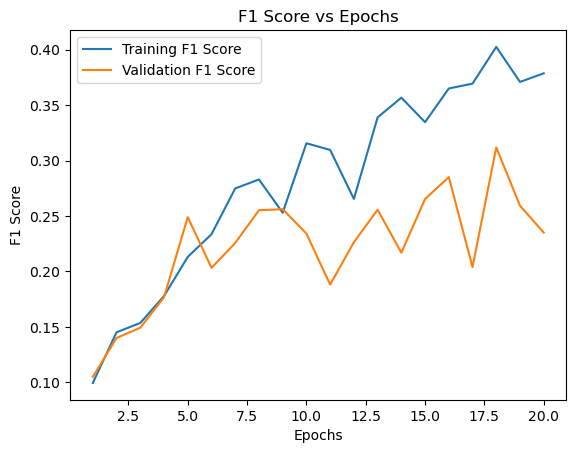

In [ ]:
# Plot F1 scores vs epochs
plt.plot(range(1, num_epochs + 1), train_f1_scores[:num_epochs], label='Training F1 Score')
plt.plot(range(1, num_epochs + 1), val_f1_scores[:num_epochs], label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()
plt.show()

We can see that the training accuracy and F1 scores have significantly dropped after introducing regularization in the model. The issue of overfitting seems to be resolved as training accuracy and validation accurracy are both low at aroound 27% now. However we will not implement L1 and L2 regularization due to poorer F1 scores and no improvement in overall accuracy.

### *4.e. Changing Optimization Algorithm*

Optimization algorithms are techniques that iteratively update the parameters of the model in order to find the optimal set of parameters that minimize the loss function. The following optimization algorthims from the torch library have been implemented here:

*1.Stochastic Gradient Descent (SGD):* It updates the model parameters in the opposite direction of the gradient of the loss function with respect to the parameters.SGD computes the gradient using a randomly selected subset of the training data (mini-batch) and has a single learning rate that controls the step size for updating the parameters

*2.AdamW (Adaptive Moment Estimation with Weight Decay):* It computes adaptive learning rates for each parameter by maintaining two moving averages of gradients: mean and uncentered variance). AdamW also includes a weight decay term, which penalizes large parameter values to prevent overfitting.

*3.Adagrad (Adaptive Gradient Algorithm):* It maintains a per-parameter learning rate that decreases over time, scaling the learning rates inversely proportional to the square root of the sum of squared gradients. Adagrad performs well for sparse data and is suitable for dealing with features with different frequencies.

*4.RMSprop (Root Mean Square Propagation):* It iss a variation of Adagrad that uses a moving average of squared gradients to normalize the learning rates, allowing for better convergence performance.

In [ ]:
# Define the neural network model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * (image_height // 8) * (image_width // 8), 128),
            nn.ELU(),
            nn.Dropout(0.5),  # Dropout layer
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 128 * (image_height // 8) * (image_width // 8))
        x = self.fc_layers(x)
        return x

In [ ]:
# Training loop
def train_model(model, criterion, optimizer, num_epochs=10):
    train_f1_scores = []
    val_f1_scores = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        true_labels_train = []
        predicted_labels_train = []

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            true_labels_train.extend(labels.cpu().numpy())
            predicted_labels_train.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)

        # Calculate F1 score for training set
        train_f1 = f1_score(true_labels_train, predicted_labels_train, average='macro')
        train_f1_scores.append(train_f1)

        print(f"\nEpoch {epoch + 1}/{num_epochs} Train Loss: {epoch_loss:.4f} Train Acc: {epoch_acc:.4f} Train F1: {train_f1:.4f}")

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        true_labels_val = []
        predicted_labels_val = []

        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.set_grad_enabled(False):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            true_labels_val.extend(labels.cpu().numpy())
            predicted_labels_val.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(val_loader.dataset)
        epoch_acc = running_corrects.double() / len(val_loader.dataset)

        # Calculate F1 score for validation set
        val_f1 = f1_score(true_labels_val, predicted_labels_val, average='macro')
        val_f1_scores.append(val_f1)

        print(f"Epoch {epoch + 1}/{num_epochs} Val Loss: {epoch_loss:.4f} Val Acc: {epoch_acc:.4f} Val F1: {val_f1:.4f}")

    return train_f1_scores, val_f1_scores

In [ ]:
# Define hyperparameters
num_epochs = 10
# Create model instance
model = CNN().to(device)
# Define loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
# Define optimizers
optimizers = {
    'SGD': torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
    'AdamW': torch.optim.AdamW(model.parameters(), lr=0.001),
    'RMSprop': torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99),
    'Adagrad': torch.optim.Adagrad(model.parameters(), lr=0.01)
}

for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} optimizer")
    train_model(model, criterion, optimizer, num_epochs=num_epochs)


Training with SGD optimizer

Epoch 1/20 Train Loss: 1.7721 Train Acc: 0.3788 Train F1: 0.3201
Epoch 1/20 Val Loss: 1.9138 Val Acc: 0.3481 Val F1: 0.2690

Epoch 2/20 Train Loss: 2.0764 Train Acc: 0.2805 Train F1: 0.2216
Epoch 2/20 Val Loss: 1.8588 Val Acc: 0.3228 Val F1: 0.2125

Epoch 3/20 Train Loss: 2.0457 Train Acc: 0.2789 Train F1: 0.2250
Epoch 3/20 Val Loss: 2.2780 Val Acc: 0.2215 Val F1: 0.1027

Epoch 4/20 Train Loss: 2.0837 Train Acc: 0.2805 Train F1: 0.2269
Epoch 4/20 Val Loss: 2.0967 Val Acc: 0.2532 Val F1: 0.1727

Epoch 5/20 Train Loss: 2.1024 Train Acc: 0.2520 Train F1: 0.2004
Epoch 5/20 Val Loss: 1.9396 Val Acc: 0.2785 Val F1: 0.1715

Epoch 6/20 Train Loss: 2.0659 Train Acc: 0.2821 Train F1: 0.2135
Epoch 6/20 Val Loss: 2.1844 Val Acc: 0.2215 Val F1: 0.1543

Epoch 7/20 Train Loss: 2.1191 Train Acc: 0.2647 Train F1: 0.2115
Epoch 7/20 Val Loss: 2.0322 Val Acc: 0.2089 Val F1: 0.1026

Epoch 8/20 Train Loss: 2.0990 Train Acc: 0.2583 Train F1: 0.2101
Epoch 8/20 Val Loss: 1.9278 Va

Epoch 5/20 Val Loss: 1.9368 Val Acc: 0.3165 Val F1: 0.1880

Epoch 6/20 Train Loss: 1.7237 Train Acc: 0.3835 Train F1: 0.3142
Epoch 6/20 Val Loss: 1.7282 Val Acc: 0.3291 Val F1: 0.2357

Epoch 7/20 Train Loss: 1.6361 Train Acc: 0.3851 Train F1: 0.3326
Epoch 7/20 Val Loss: 1.7340 Val Acc: 0.3608 Val F1: 0.2592

Epoch 8/20 Train Loss: 1.5805 Train Acc: 0.3994 Train F1: 0.3369
Epoch 8/20 Val Loss: 1.8113 Val Acc: 0.3671 Val F1: 0.2594

Epoch 9/20 Train Loss: 1.5841 Train Acc: 0.4247 Train F1: 0.3679
Epoch 9/20 Val Loss: 1.7649 Val Acc: 0.3481 Val F1: 0.2724

Epoch 10/20 Train Loss: 1.4859 Train Acc: 0.4485 Train F1: 0.3872
Epoch 10/20 Val Loss: 1.7686 Val Acc: 0.3734 Val F1: 0.2846

Epoch 11/20 Train Loss: 1.5316 Train Acc: 0.4390 Train F1: 0.3705
Epoch 11/20 Val Loss: 1.7256 Val Acc: 0.3481 Val F1: 0.2950

Epoch 12/20 Train Loss: 1.4583 Train Acc: 0.4643 Train F1: 0.4110
Epoch 12/20 Val Loss: 1.7342 Val Acc: 0.3481 Val F1: 0.2866

Epoch 13/20 Train Loss: 1.3927 Train Acc: 0.4865 Train F1: 

Using different optimizers we see that performance does not improve by using the SGD method as the training accuracy and f1 scores have dropped significantly. Highest training accuracy is obtained by using the Adagrad optimizer but F1 scores are lower compared to the other functions.

Results for RMSProp and AdamW are quite similar but AdamW performs better in terms of final validation f1 score and accuracy. As this is a classification problem, f1 score should be an important factor for evaluating model performance.

### Final Model

In [ ]:
# Define the neural network model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * (image_height // 8) * (image_width // 8), 128),
            nn.ReLU(),
            #nn.Dropout(0.4),  # Dropout layer
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 128 * (image_height // 8) * (image_width // 8))
        x = self.fc_layers(x)
        return x

In [ ]:
# Initialize the model
model = CNN()
# Define hyperparameters - loss function, optimizer, epochs, learning rate
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

In [ ]:
# Train the model
train_model(model, criterion, optimizer, num_epochs=num_epochs)


Epoch 1/20 Train Loss: 2.2176 Train Acc: 0.2710 Train F1: 0.1260
Epoch 1/20 Val Loss: 1.9307 Val Acc: 0.2532 Val F1: 0.1083

Epoch 2/20 Train Loss: 2.2246 Train Acc: 0.2853 Train F1: 0.1300
Epoch 2/20 Val Loss: 1.9357 Val Acc: 0.2658 Val F1: 0.1159

Epoch 3/20 Train Loss: 2.2180 Train Acc: 0.2742 Train F1: 0.1274
Epoch 3/20 Val Loss: 1.9589 Val Acc: 0.2595 Val F1: 0.1133

Epoch 4/20 Train Loss: 2.2256 Train Acc: 0.2805 Train F1: 0.1301
Epoch 4/20 Val Loss: 1.9331 Val Acc: 0.2595 Val F1: 0.1321

Epoch 5/20 Train Loss: 2.2205 Train Acc: 0.2884 Train F1: 0.1356
Epoch 5/20 Val Loss: 1.9815 Val Acc: 0.2722 Val F1: 0.1147

Epoch 6/20 Train Loss: 2.2218 Train Acc: 0.2884 Train F1: 0.1371
Epoch 6/20 Val Loss: 1.9673 Val Acc: 0.2658 Val F1: 0.1088

Epoch 7/20 Train Loss: 2.2161 Train Acc: 0.2520 Train F1: 0.1151
Epoch 7/20 Val Loss: 1.9394 Val Acc: 0.2785 Val F1: 0.1307

Epoch 8/20 Train Loss: 2.2313 Train Acc: 0.2805 Train F1: 0.1311
Epoch 8/20 Val Loss: 1.9541 Val Acc: 0.2595 Val F1: 0.1175


([0.12603969322996444,
  0.12996643684868395,
  0.12738213175713176,
  0.1300764695627586,
  0.13560106644538694,
  0.1370653971394756,
  0.11507452376615654,
  0.13112957328027783,
  0.12617430447639727,
  0.13364399106513444,
  0.1267430370314373,
  0.13043547367105618,
  0.1196974763266648,
  0.12644512791610357,
  0.12923815371392347,
  0.12247556454330974,
  0.1291404074479799,
  0.13353753298882182,
  0.12343243819266836,
  0.13248207740892676],
 [0.10826781916718117,
  0.1158715081128874,
  0.11332732634338138,
  0.13213893053473263,
  0.11466291145925013,
  0.10883586083853701,
  0.1306738637483979,
  0.11751903020858306,
  0.11232112917690179,
  0.13403108690719312,
  0.13078279744946414,
  0.11184267113935209,
  0.1233324101001708,
  0.14320423054925185,
  0.1242503823553087,
  0.11900676186390473,
  0.13493746025015899,
  0.1292591846909035,
  0.1450565856807846,
  0.10126824387947268])

### *4.f. Graph of f1 score vs epochs for training and validation set*

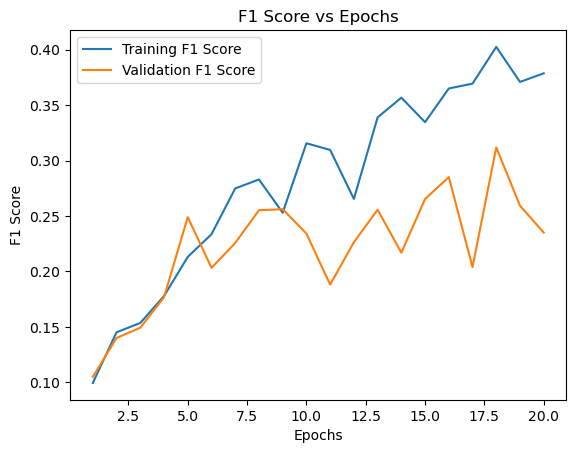

In [ ]:
# Plot F1 scores vs epochs
plt.plot(range(1, num_epochs + 1), train_f1_scores[:num_epochs], label='Training F1 Score')
plt.plot(range(1, num_epochs + 1), val_f1_scores[:num_epochs], label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Epochs')
plt.legend()
plt.show()

### *4.g. Calculating number of trainable parameters in final model*

In [ ]:
# Print the model details
print(model)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.4, inplace=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=18432, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=8, bias=True)
  )
)


In [ ]:
# Calculate the total number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Trainable Parameters: {total_params}")

Total Trainable Parameters: 2453704
